# Nonlinear SVM Classification,, Polynomial Regression, Similarity Features, Gaussian RBF Kernel

## Import Libaraies

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC

In [54]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Nonlinear SVM Classification

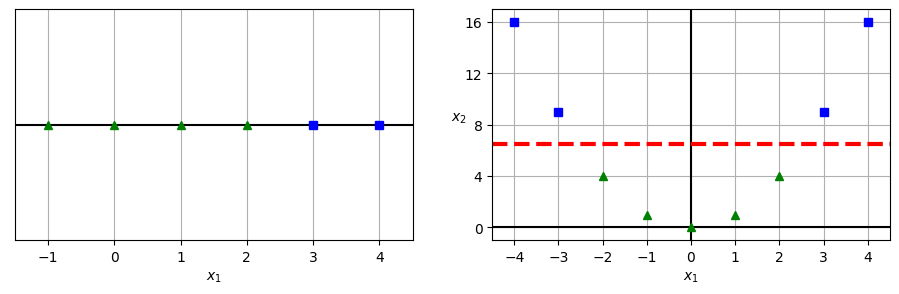

In [55]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D , X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color = "k")
plt.plot(X1D[:, 0][y == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y == 1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-1.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color="k")
plt.axvline(x=0, color = "k")
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
plt.plot(X2D[:,0][y == 1], X2D[:, 1][y == 1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation = 0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5],  "r--", linewidth = 3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right= 1)
save_fig("higher_dimensions_plot", tight_layout=False)

In [56]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state= 42)


polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree= 3),
    StandardScaler(),
    LinearSVC(C = 10, max_iter = 10_000, dual = True, random_state = 42)
)

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [57]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

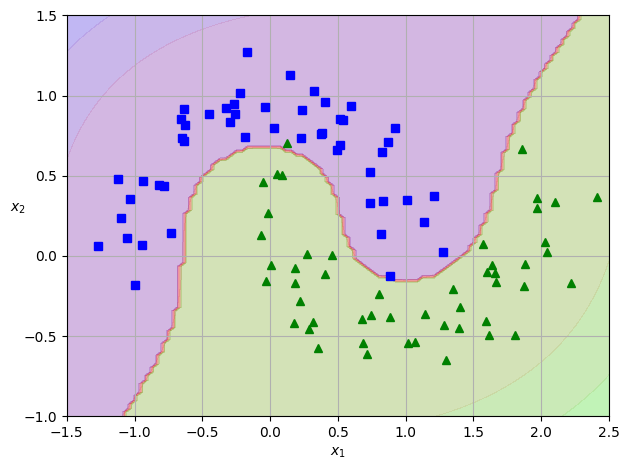

In [58]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
save_fig("moons_polynomial_svc_plot")

## Polynomial Kernel

In [59]:
polynomial_kernel_svm_clf = make_pipeline(StandardScaler(), 
                                  SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
polynomial_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [60]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel = 'poly', degree = 10, coef0 = 100, C = 5)
)
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

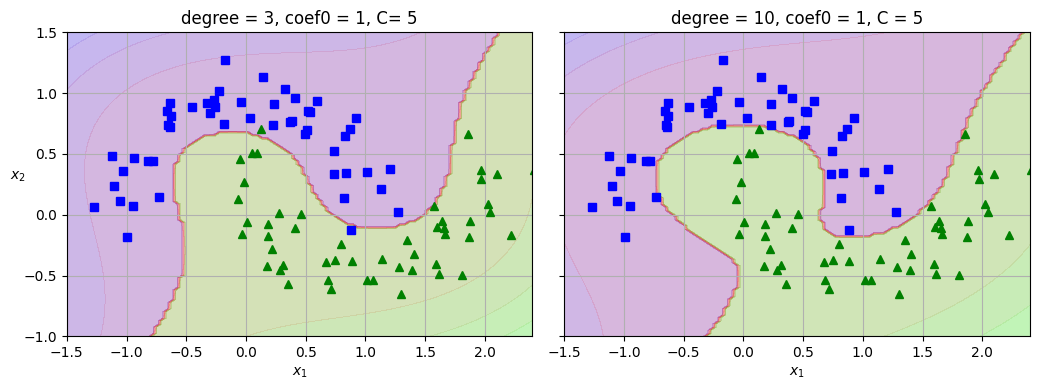

In [61]:
fig, axes = plt.subplots(ncols = 2, figsize = (10.5, 4), sharey = True)

plt.sca(axes[0])
plot_predictions(polynomial_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree = 3, coef0 = 1, C= 5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree = 10, coef0 = 1, C = 5")
plt.ylabel("")
save_fig("moons_kernelized_polynomial_svc_plot")

## Similarity Features

In [62]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark, axis =1 )**2)

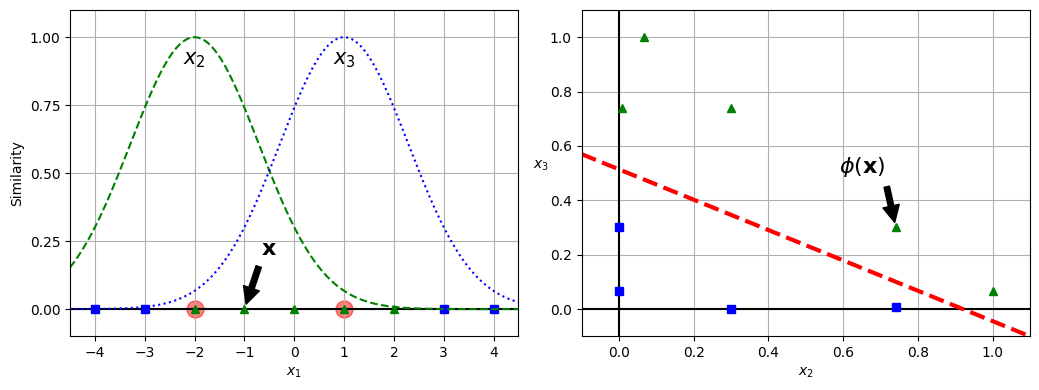

In [63]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y = 0, color = "k")
plt.scatter(x = [-2, 1], y= [0, 0], s=150, alpha = 0.5, c ="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r"$\mathbf{x}$",
    xy = (X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha = "center",
    arrowprops = dict(facecolor = "black", shrink = 0.1),
    fontsize = 16
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize =15)
plt.text(1, 0.9, "$x_3$", ha = "center", fontsize = 15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")

## Gaussian RBF Kernel

In [64]:
rbf_kernel_svm = make_pipeline(StandardScaler(),
                              SVC(kernel="rbf", gamma = 5, C =0.001))
rbf_kernel_svm.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

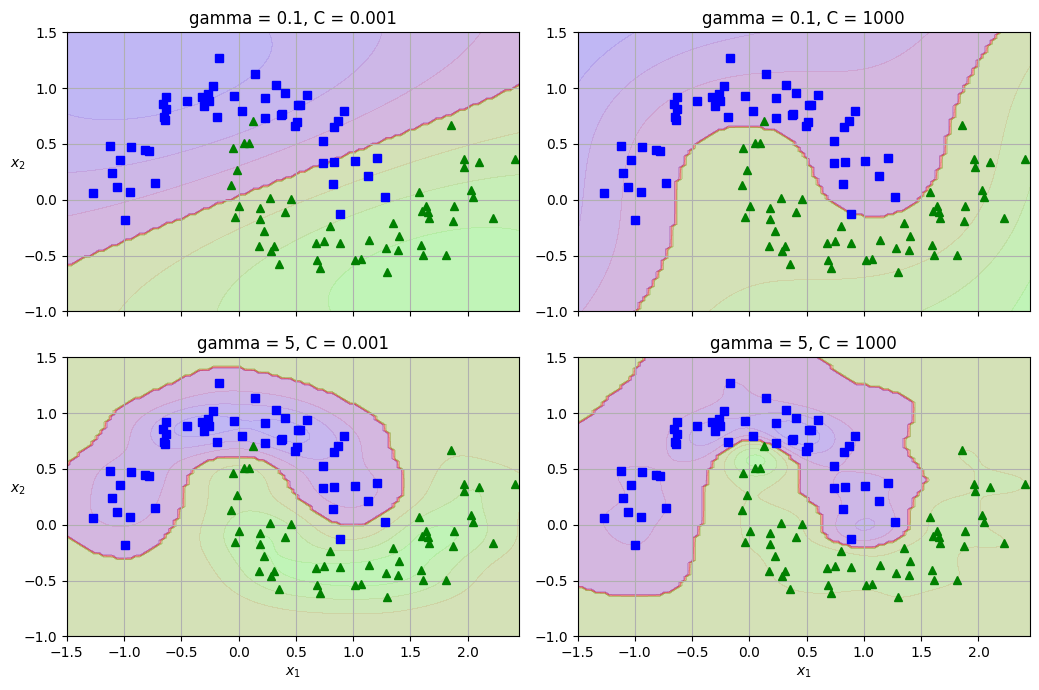

In [68]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparam = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparam:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel = "rbf", gamma= gamma, C= C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

    
fig, axes = plt.subplots(nrows = 2, ncols = 2 , figsize = (10.5, 7), sharex = True)

for i , svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparam[i]
    plt.title(f"gamma = {gamma}, C = {C}")
    if i in (0,1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
        
save_fig("moons_rbf_svc_plot") 